# I. LOAD DỮ LIỆU

## 1) Import những thư viện cần thiết

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib import pyplot as plt
from sklearn import metrics

%matplotlib inline
import datetime
import pandas as pd
import seaborn as sns
from sklearn import preprocessing as pp
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from catboost import CatBoostClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

## 2) Load dữ liệu

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df1 = pd.read_csv('translate.csv')
df1

,columns_name,columns_translate,data,data_translate
0,class,Phân loại nấm,e,ăn được
1,class,Phân loại nấm,p,độc (không ăn được)
2,cap-shape,Hình dạng nón,x,lõm
3,cap-shape,Hình dạng nón,f,phẳng
4,cap-shape,Hình dạng nón,k,núm
...,...,...,...,...
114,habitat,Môi trường sống,p,path
115,habitat,Môi trường sống,l,cỏ
116,habitat,Môi trường sống,u,đá
117,habitat,Môi trường sống,m,đồng cỏ


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# II. DATA UNDERSTANDING

## 2.1 Mô tả dữ liệu

In [7]:
#Mô tả các cột trong dataset:
print(df.columns)
print('Số cột của dữ liệu (features): '  +str(len(df.columns)-1))
print('Số class của dữ liệu: '+str(len(df['class'].value_counts().index)) )
print('Số mẫu của dữ liệu: '  +str(df.shape[0]) )

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
Số cột của dữ liệu (features): 22
Số class của dữ liệu: 2
Số mẫu của dữ liệu: 8124


In [8]:
#Show các dữ liệu duplicate (nếu có):
df[df.duplicated()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [9]:
#Mô tả các biến trong từng features:
print('Dữ liệu trong mỗi cột như sau:')
for i in df.columns:
    print('Dữ liệu của cột',i,":",list(df[i].value_counts().index))

Dữ liệu trong mỗi cột như sau:
Dữ liệu của cột class : ['e', 'p']
Dữ liệu của cột cap-shape : ['x', 'f', 'k', 'b', 's', 'c']
Dữ liệu của cột cap-surface : ['y', 's', 'f', 'g']
Dữ liệu của cột cap-color : ['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r']
Dữ liệu của cột bruises : ['f', 't']
Dữ liệu của cột odor : ['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm']
Dữ liệu của cột gill-attachment : ['f', 'a']
Dữ liệu của cột gill-spacing : ['c', 'w']
Dữ liệu của cột gill-size : ['b', 'n']
Dữ liệu của cột gill-color : ['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r']
Dữ liệu của cột stalk-shape : ['t', 'e']
Dữ liệu của cột stalk-root : ['b', '?', 'e', 'c', 'r']
Dữ liệu của cột stalk-surface-above-ring : ['s', 'k', 'f', 'y']
Dữ liệu của cột stalk-surface-below-ring : ['s', 'k', 'f', 'y']
Dữ liệu của cột stalk-color-above-ring : ['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y']
Dữ liệu của cột stalk-color-below-ring : ['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y']
Dữ liệu của cột veil-type

## 2.2 Exploreatory Data Analysis - EDA (Phân tích dữ liệu khám phá)

In [10]:
def plot_bar(df,name): #Function vẽ biểu đồ
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']    #màu của các cột
    a = list(df[name].value_counts().index)  
    b = list(df[name].value_counts())
    plt.bar(a,b,color=colors)
    plt.ylabel('Đếm')
    plt.title('Bảng phân bố cột '+str(name))
    for i in range(len(a)):
        plt.text(i,b[i],b[i],ha='center')
    return a,b

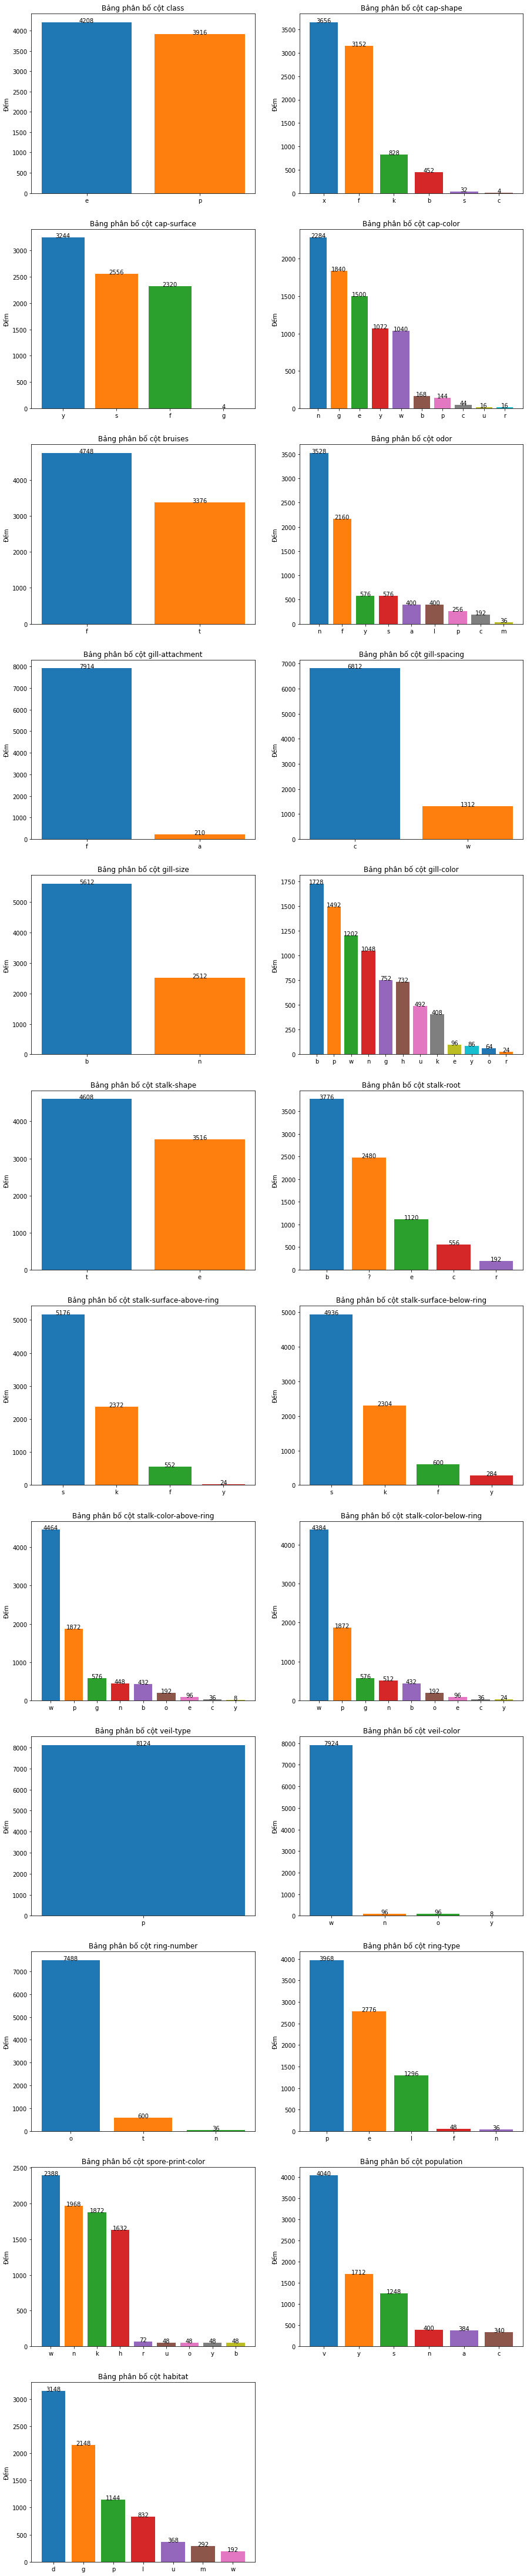

In [11]:
plt.figure(figsize=(15,100))   #Kích thước của mỗi biểu đồ
for n,i in enumerate(df.columns): #Vẽ các biểu đồ
    plt.subplot(15,2,n+1)
    plot_bar(df,i)
    n+=1

# III. DATA PREPARATION (Chuẩn bị dữ liệu)

## 1) Xử lý dữ liệu:

- Dựa vào các biểu đồ, ta có thể thấy:
    + feature 'veil-type' (loại màng) chỉ có 1 giá trị duy nhất. 
    + feature 'stalk-root' chứa hơn 1 nửa giá trị "?" (missing).

In [12]:
print('cột veil-type')
print(df['veil-type'].value_counts())

cột veil-type
p    8124
Name: veil-type, dtype: int64


In [13]:
print('cột stalk-root')
print(df['stalk-root'].value_counts(),'\n')
print('Số dữ liệu bị thiếu tại feature stalk-root: ',df['stalk-root'].value_counts()['?'])

cột stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64 

Số dữ liệu bị thiếu tại feature stalk-root:  2480


- Replace các giá trị missing và Drop cột 'Veil-type'

In [14]:
df.replace('?','missing',inplace=True)
df.drop(columns=['veil-type'],inplace=True)

## 2) Chuyển đổi thuộc tính dữ liệu:

In [15]:
#Dùng labe encoder để chuyển đổi dữ liệu, đồng thời tạo mapping để tiện chuyển đổi:
le = pp.LabelEncoder()
label_dict = {}
mapping = {}
for cols in df.columns:
    class_dict = {}
    df[cols] = le.fit_transform(df[cols])
    mapping[cols] = dict(zip(le.classes_, range(len(le.classes_))))
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [16]:
for i in df.columns:
    print(i)
    print(pd.Series(mapping[i]))

class
e    0
p    1
dtype: int64
cap-shape
b    0
c    1
f    2
k    3
s    4
x    5
dtype: int64
cap-surface
f    0
g    1
s    2
y    3
dtype: int64
cap-color
b    0
c    1
e    2
g    3
n    4
p    5
r    6
u    7
w    8
y    9
dtype: int64
bruises
f    0
t    1
dtype: int64
odor
a    0
c    1
f    2
l    3
m    4
n    5
p    6
s    7
y    8
dtype: int64
gill-attachment
a    0
f    1
dtype: int64
gill-spacing
c    0
w    1
dtype: int64
gill-size
b    0
n    1
dtype: int64
gill-color
b     0
e     1
g     2
h     3
k     4
n     5
o     6
p     7
r     8
u     9
w    10
y    11
dtype: int64
stalk-shape
e    0
t    1
dtype: int64
stalk-root
b          0
c          1
e          2
missing    3
r          4
dtype: int64
stalk-surface-above-ring
f    0
k    1
s    2
y    3
dtype: int64
stalk-surface-below-ring
f    0
k    1
s    2
y    3
dtype: int64
stalk-color-above-ring
b    0
c    1
e    2
g    3
n    4
o    5
p    6
w    7
y    8
dtype: int64
stalk-color-below-ring
b    0
c    1
e   

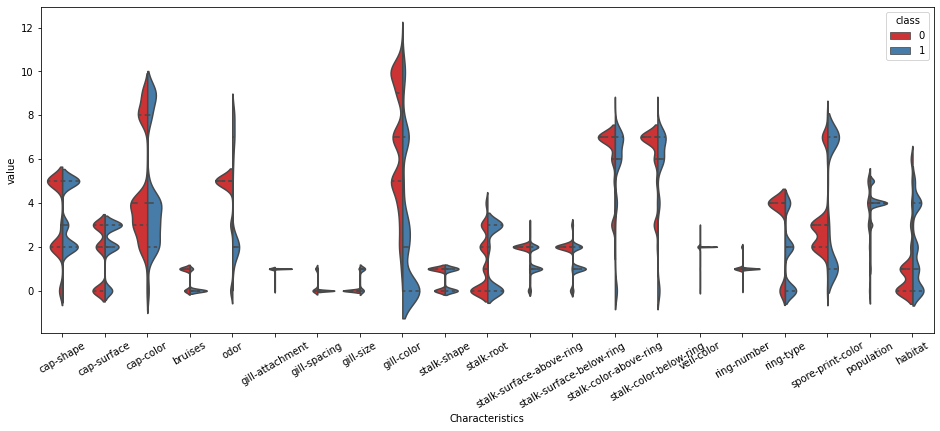

In [17]:
#Violin plot thể hiện tỉ lệ giữa class 0 và 1 trong các features:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 30, labels = list(df_no_class.columns));
plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

## 3) Chuẩn bị và phân tách dữ liệu

In [18]:
#Set giữ liệu cho X và Y:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
#Set headers:
headers = list(X.columns.values)

<AxesSubplot:>

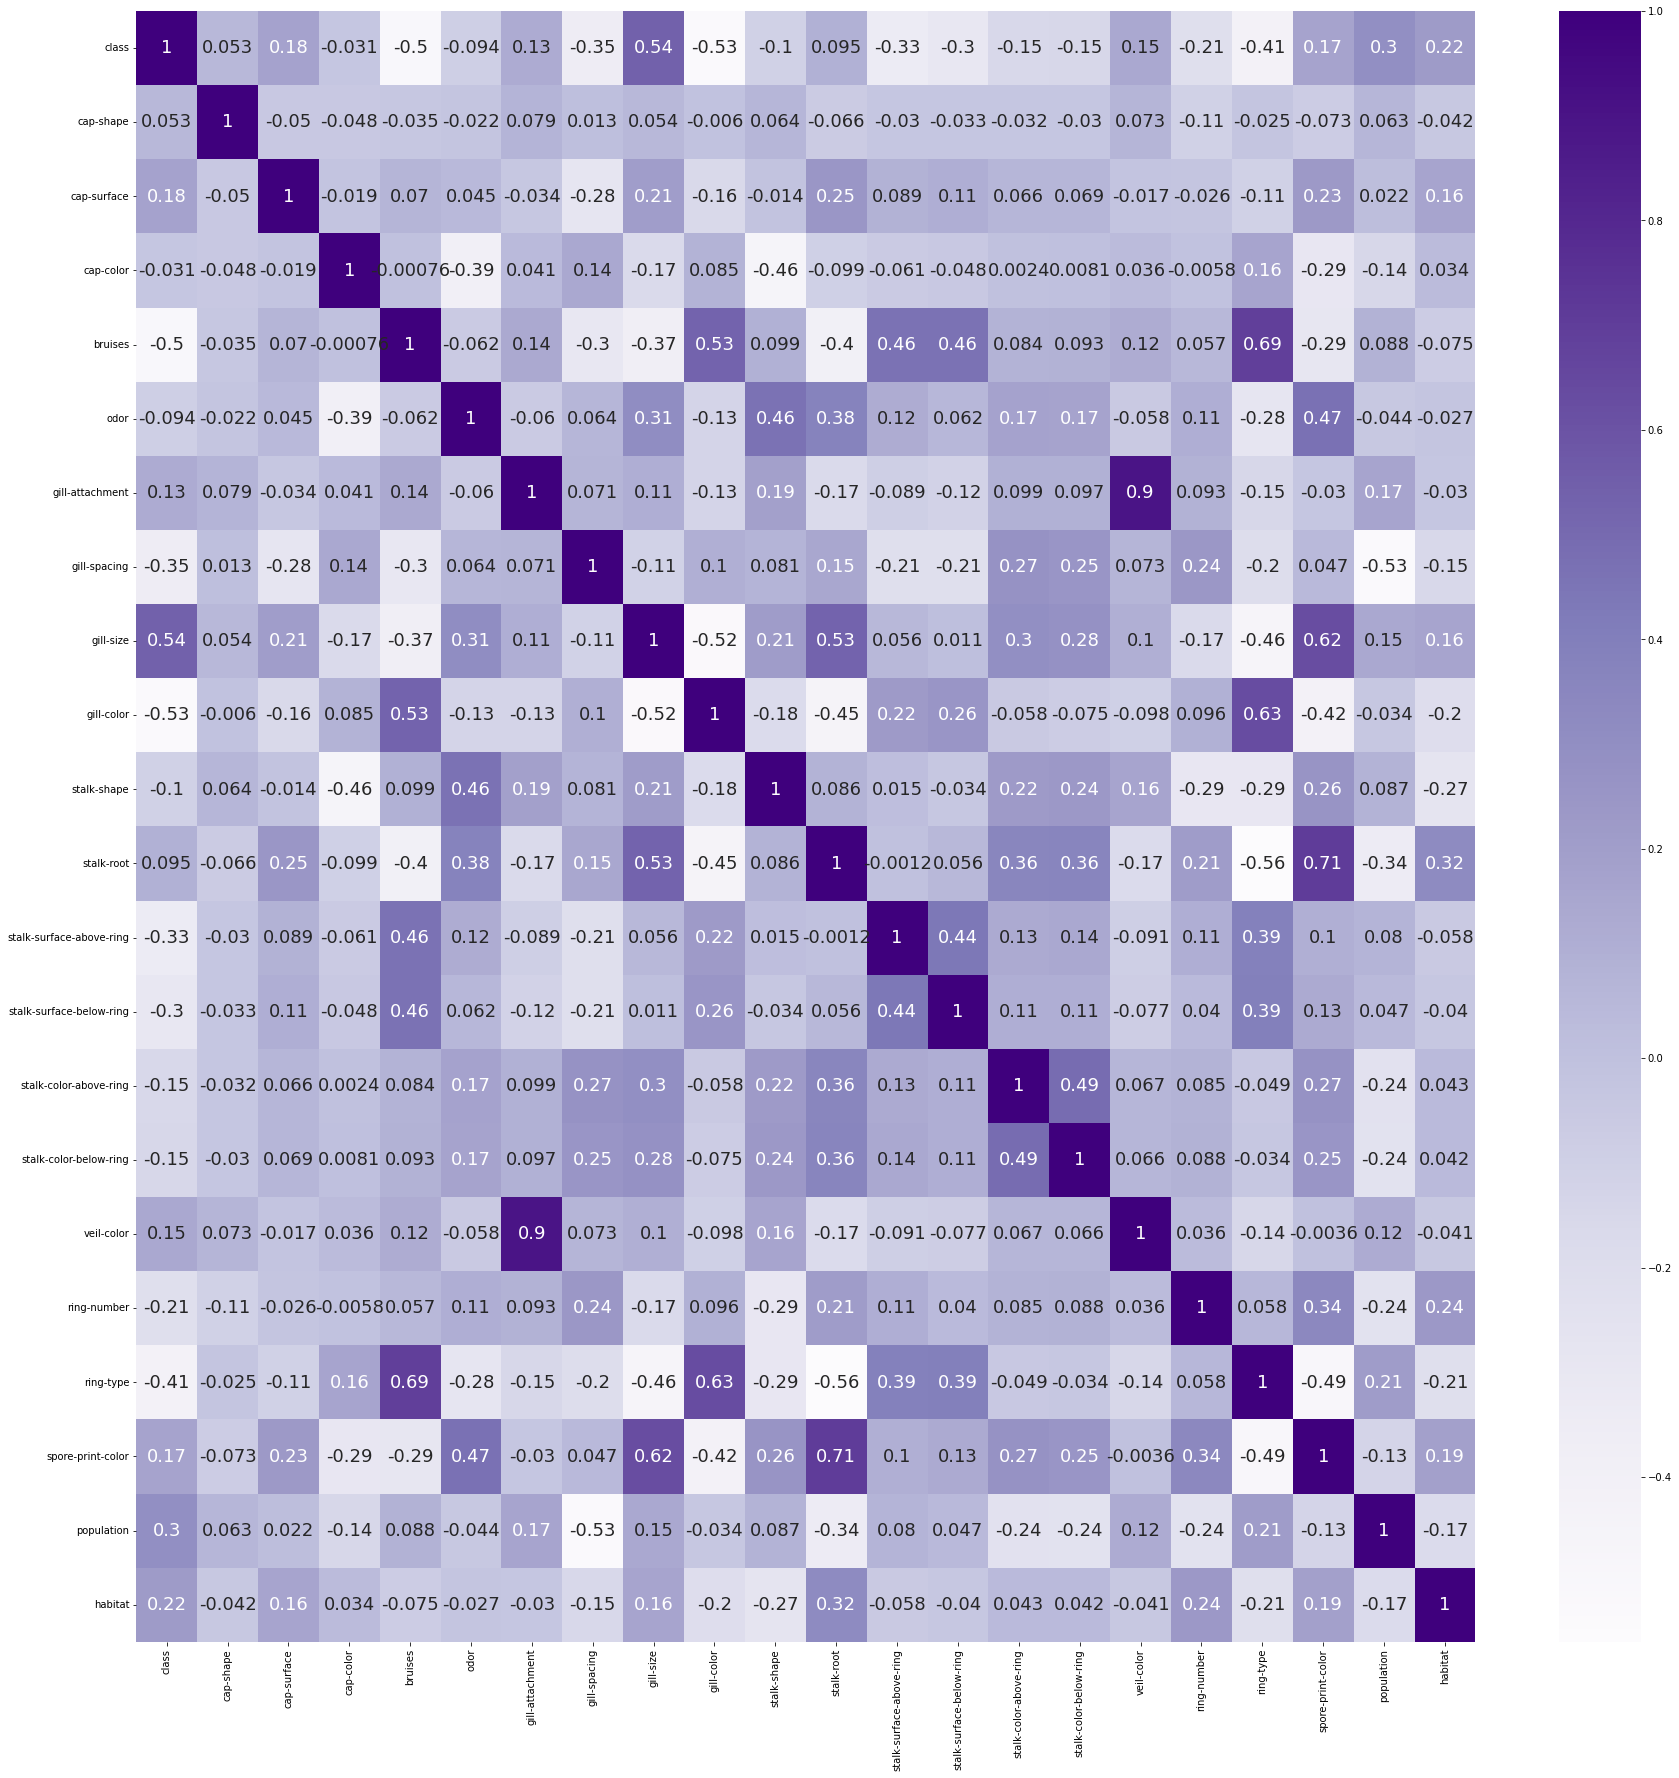

In [19]:
#Vẽ ma trận corr để xem độ tương quan của class với các features còn lại:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True,cmap='Purples',annot_kws={'size':18})


- Dựa vào ma trận tương quan, ta có thể thấy có 2 features có hệ số tương quan cao hơn:
   + gill-size : 0.54
   + gill-color: -0.53

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


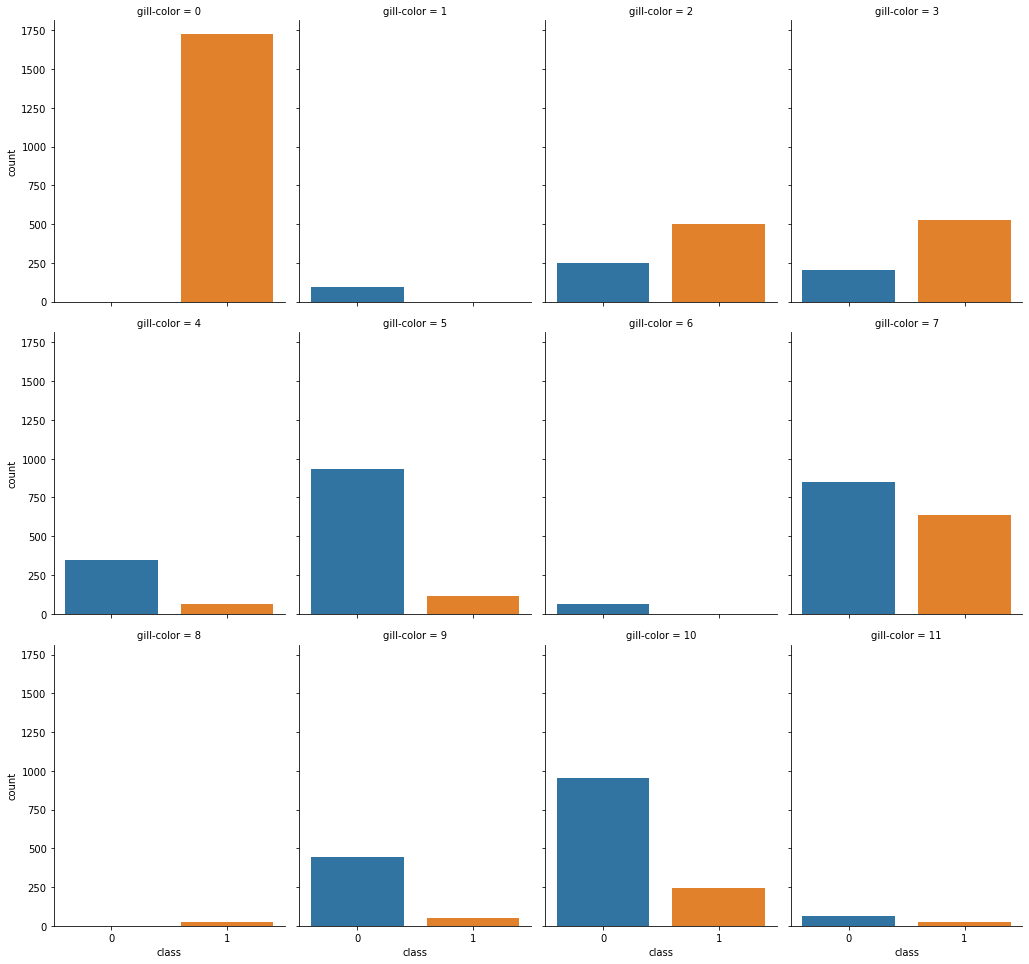

In [20]:
new_var = df[['class', 'gill-color']]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

- Kết luận:  gill-color code càng tăng thì rơi vô class 0 càng tăng.

In [21]:
df[['class', 'gill-size']].groupby(['gill-size'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-size,class
1,1,0.885350
0,0,0.301497


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


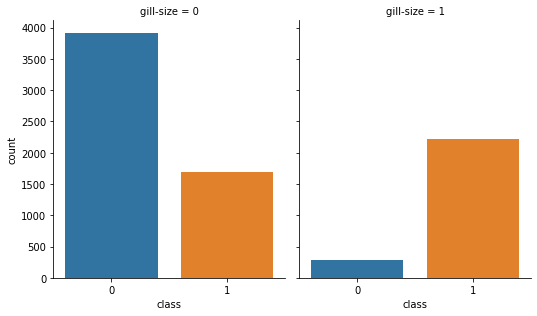

In [22]:
new_var1 = df[['class', 'gill-size']]
sns.factorplot('class', col='gill-size', data=new_var1, kind='count', size=4.5, aspect=.8, col_wrap=4);

In [23]:
# Tách tập train, test, validation:
x_train, x_valtest, y_train,y_valtest = train_test_split(X,Y,test_size=0.2,random_state=0)
x_test,x_val,y_test,y_val = train_test_split(x_valtest,y_valtest,test_size=0.5,random_state=0)

In [24]:
print('Shape của tập x_train:',x_train.shape)
print('Shape của tập x_test :',x_test.shape)
print('Shape của tập x_val :',x_val.shape)
print('Shape của tập y_train:',y_train.shape)
print('Shape của tập y_test :',y_test.shape)
print('Shape của tập y_val :',y_val.shape)

Shape của tập x_train: (6499, 21)
Shape của tập x_test : (812, 21)
Shape của tập x_val : (813, 21)
Shape của tập y_train: (6499,)
Shape của tập y_test : (812,)
Shape của tập y_val : (813,)


# IV. MÔ HÌNH HÓA 

## 1) Desicion Tree:

### 1.1 Mô hình hóa

In [25]:
#ô hình hóa
dt =DTC(criterion= 'gini', max_depth= 7, splitter='random')
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dtc_f1score,dtc_precision,dtc_recall = f1_score(y_pred,y_test),precision_score(y_pred,y_test),recall_score(y_pred,y_test)

### 1.2 Biểu đồ đánh giá

#### Visualize f1-score

Features ảnh hưởng lớn nhất đến kết quả phần loại:  odor


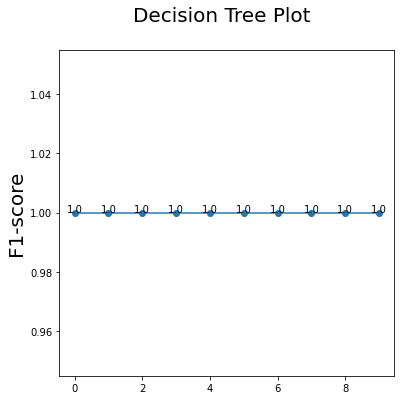

In [26]:
decision_tree = []
decision_tree_ans = []
for i in range(10):
    dt =DTC(criterion= 'gini', max_depth= 7, splitter='random') #Mô hình hóa
    dt.fit(x_train,y_train) #Fit mô hình
    prediction = dt.predict(x_test) # Dự đoán mô hình
    decision_tree.append(f1_score(y_test,prediction)) # Tính f1-score
    feature_temp = dt.feature_importances_ #Show important feature
    decision_tree_ans.append(feature_temp)
#Vẽ biểu đồ thyể hiện f1-score sau những lần chạy ngẫu nhiên:
plt.figure(figsize=(6,6))
plt.suptitle('Decision Tree Plot',fontsize=20)
plt.plot(decision_tree,'-o')
for i in range(len(decision_tree)):
    plt.text(i,decision_tree[i],round(decision_tree[i],4),ha='center')
plt.ylabel('F1-score',fontsize=20)

temp = []
for i in range(0,len(decision_tree_ans)):
    temp.append(np.argmax(decision_tree_ans[i]))
mode = max(set(temp),key=temp.count)
print('Features ảnh hưởng lớn nhất đến kết quả phần loại: ', headers[mode])

#### Cross-Validation

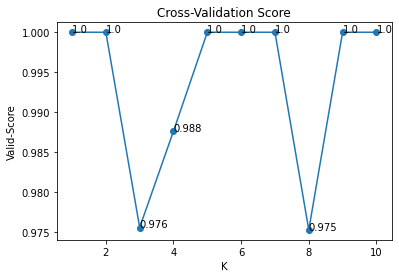

In [27]:
kf = KFold(n_splits=10)
DT_cross_score = cross_val_score(dt,x_val,y_val,cv=kf)
plt.plot(np.arange(1,11),DT_cross_score,'-o')
plt.title('Cross-Validation Score')
plt.xlabel('K')
plt.ylabel('Valid-Score')
for i in range(1,11):
    plt.text(i,DT_cross_score[i-1],round(DT_cross_score[i-1],3))

#### Importance Feature

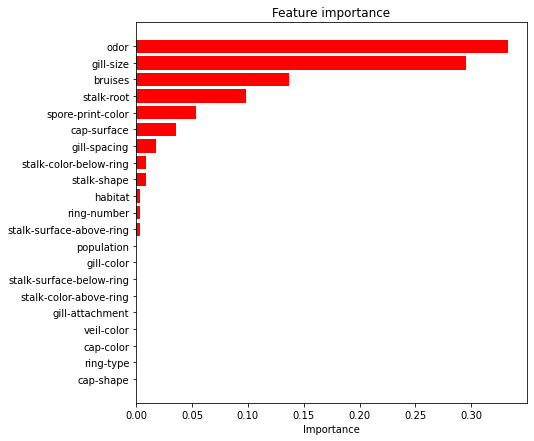

In [28]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(7,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

### 1.3) Confusion Matrix - DT:

In [29]:
print('Decision Tree Classifier report: \n',classification_report(y_test,y_pred))

Decision Tree Classifier report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       388

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812



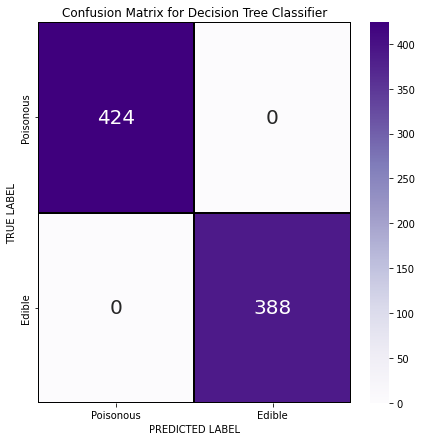

In [30]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2 ,annot_kws={'size':20},linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## 2) Logistic Regression:

### 2.1) Mô hình hóa

In [31]:
lr = LR(n_jobs=-1)
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
print('Giá trị f1-score %.7f' %f1_score(prediction,y_test))

Giá trị f1-score 0.9609375


### 2.2) Fine-Tuning

In [32]:
logis_para = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],'solver':['liblinear','sag','saga','newton-cg'],'class_weight':[None,'balanced']}
LR_para = GridSearchCV(LR(),logis_para,cv=10,scoring='accuracy',n_jobs=-1)
LR_para.fit(x_train,y_train)

print(LR_para.best_params_)

{'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}


### 2.3) Chạy lại mô hình và đánh giá

#### Pre-train

In [33]:
Logistics = []
lr =LR(C=100,class_weight='balanced',solver='liblinear')
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
lgs_f1score,lgs_precision,lgs_recall = f1_score(prediction,y_test),precision_score(prediction,y_test),recall_score(prediction,y_test)
print('LR F1-Score : %.2f'%lgs_f1score)
print('LR Recall   : %.2f'%lgs_recall)
print('LR Precision: %.2f'%lgs_precision)

LR F1-Score : 0.97
LR Recall   : 0.97
LR Precision: 0.96


#### Cross-Validation 

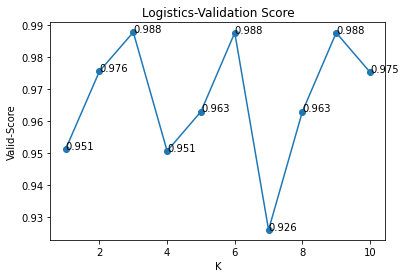

In [34]:
kf = KFold(n_splits=10)
lr_cross_score = cross_val_score(lr,x_val,y_val,cv=kf)
plt.plot(np.arange(1,11),lr_cross_score,'-o')
plt.title('Logistics-Validation Score')
plt.xlabel('K')
plt.ylabel('Valid-Score')
for i in range(1,11):
    plt.text(i,lr_cross_score[i-1],round(lr_cross_score[i-1],3))

### 2.4) Confusion Matrix - LR

In [35]:
print('Decision Tree Classifier report: \n',classification_report(y_test,prediction))

Decision Tree Classifier report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       424
           1       0.97      0.96      0.97       388

    accuracy                           0.97       812
   macro avg       0.97      0.97      0.97       812
weighted avg       0.97      0.97      0.97       812



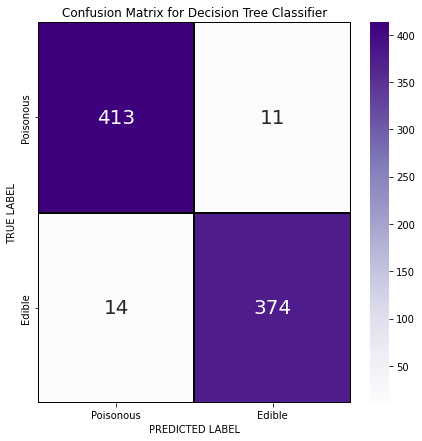

In [36]:
cm = confusion_matrix(y_test, prediction)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2,annot_kws={'size':20}, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## 3) KNN

### 3.1) Chạy thử ngẫu nhiên các hệ số K để chọn ra K tốt nhất:

Giá trị K cho thông số tốt nhất là:  5
Giá trị f1-score 0.9987130


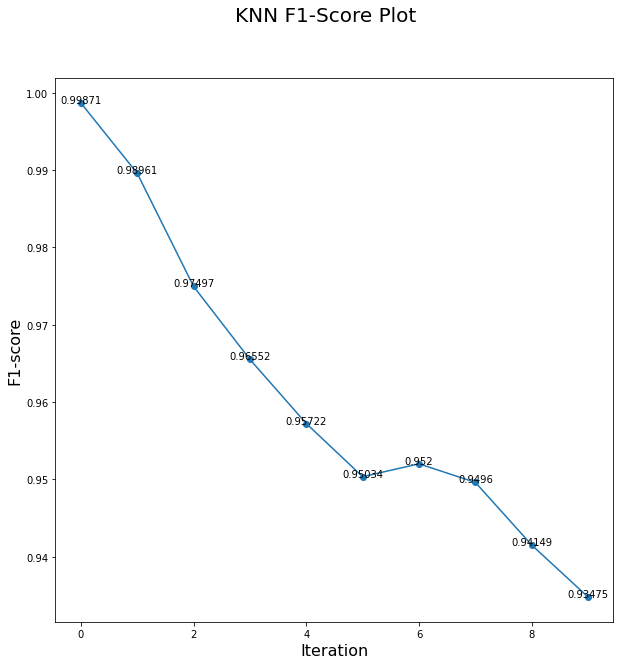

In [37]:
neighbours = [x for x in range(5,200,20)]
knn_1 = []
for i in range(len(neighbours)):
    knn = KNN(n_neighbors=neighbours[i],n_jobs=-1)
    knn.fit(x_train,y_train)
    prediction = knn.predict(x_test)
    f1 = f1_score(y_test,prediction)
    knn_1.append(f1)
plt.figure(figsize=(10,10))
plt.suptitle('KNN F1-Score Plot',fontsize=20)
plt.plot(knn_1,'-o')
for i in range(len(knn_1)):
    plt.text(i,knn_1[i],round(knn_1[i],5),ha='center')
plt.ylabel('F1-score',fontsize=16)
plt.xlabel('Iteration',fontsize=16)
print('Giá trị K cho thông số tốt nhất là: ',neighbours[knn_1.index(max(set(knn_1)))])
print('Giá trị f1-score %.7f' %max(set(knn_1)))

### 3.2) Chạy lại mô hình và đánh giá:

#### Pre-train

In [38]:
knn = KNN(n_neighbors=5,n_jobs=-1)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_f1score,knn_precision,knn_recall = f1_score(knn_pred,y_test),precision_score(knn_pred,y_test),recall_score(knn_pred,y_test)
print('KNN F1-Score : %.2f'%knn_f1score)
print('KNN Recall   : %.2f'%knn_recall)
print('KNN Precision: %.2f'%knn_precision)


KNN F1-Score : 1.00
KNN Recall   : 1.00
KNN Precision: 1.00


#### Cross-Validation 

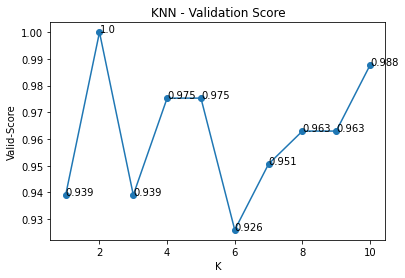

In [39]:
kf = KFold(n_splits=10)
knn_cross_score = cross_val_score(knn,x_val,y_val,cv=kf)
plt.plot(np.arange(1,11),knn_cross_score,'-o')
plt.title('KNN - Validation Score')
plt.xlabel('K')
plt.ylabel('Valid-Score')
for i in range(1,11):
    plt.text(i,knn_cross_score[i-1],round(knn_cross_score[i-1],3))

### 3.3) Confusion Matrix - KNN:

In [40]:
print('Decision Tree Classifier report: \n',classification_report(y_test,knn_pred))

Decision Tree Classifier report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       388

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812



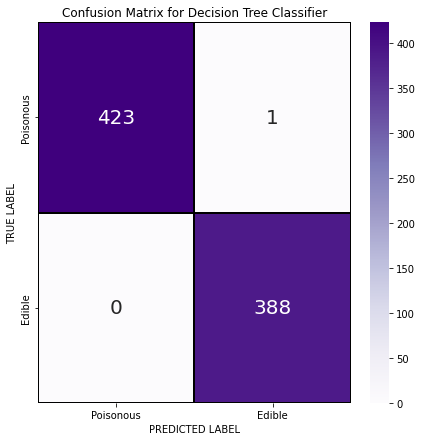

In [41]:
cm = confusion_matrix(y_test, knn_pred)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, annot_kws={'size':20},linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## 4) CatBoost

### 4.1) Mô hình hóa

In [42]:
clf = CatBoostClassifier(iterations=3000,learning_rate=0.001)
clf.fit(x_train,y_train,
        eval_set=(x_val,y_val))
cat_prediction = clf.predict(x_test)
print(clf.get_params())

cat_f1score,cat_precision,cat_recall = f1_score(cat_prediction,y_test),precision_score(cat_prediction,y_test),recall_score(cat_prediction,y_test)
print('Catboost F1-Score : %.2f'%cat_f1score)
print('Catboost Recall   : %.2f'%cat_recall)
print('Catboost Precision: %.2f'%cat_precision)

0:	learn: 0.6900490	test: 0.6900293	best: 0.6900293 (0)	total: 138ms	remaining: 6m 53s
1:	learn: 0.6873257	test: 0.6872947	best: 0.6872947 (1)	total: 140ms	remaining: 3m 29s
2:	learn: 0.6846119	test: 0.6846007	best: 0.6846007 (2)	total: 141ms	remaining: 2m 21s
3:	learn: 0.6824028	test: 0.6823764	best: 0.6823764 (3)	total: 143ms	remaining: 1m 47s
4:	learn: 0.6798992	test: 0.6799146	best: 0.6799146 (4)	total: 144ms	remaining: 1m 26s
5:	learn: 0.6772509	test: 0.6772919	best: 0.6772919 (5)	total: 146ms	remaining: 1m 12s
6:	learn: 0.6741257	test: 0.6741536	best: 0.6741536 (6)	total: 148ms	remaining: 1m 3s
7:	learn: 0.6716699	test: 0.6716808	best: 0.6716808 (7)	total: 149ms	remaining: 55.8s
8:	learn: 0.6691355	test: 0.6691359	best: 0.6691359 (8)	total: 151ms	remaining: 50s
9:	learn: 0.6661662	test: 0.6661995	best: 0.6661995 (9)	total: 152ms	remaining: 45.4s
10:	learn: 0.6631947	test: 0.6632075	best: 0.6632075 (10)	total: 154ms	remaining: 41.7s
11:	learn: 0.6607326	test: 0.6607359	best: 0.660

### 4.2) Đánh giá

In [43]:
kf = KFold(n_splits=10)
cat_cross_score = cross_val_score(clf,x_val,y_val,cv=kf,fit_params={'verbose':False})
cat_cross_valscore = cat_cross_score


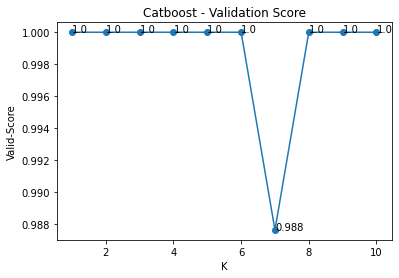

In [44]:
plt.plot(np.arange(1,11),cat_cross_valscore,'-o')
plt.title('Catboost - Validation Score')
plt.xlabel('K')
plt.ylabel('Valid-Score')
for i in range(1,11):
    plt.text(i,cat_cross_valscore[i-1],round(cat_cross_valscore[i-1],3))

#### 4.3) Confusion Matrix - Catboost

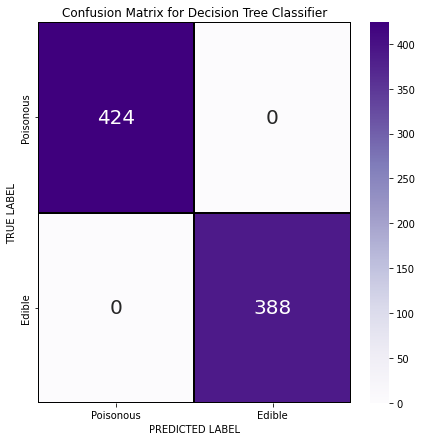

In [45]:
cm = confusion_matrix(y_test, cat_prediction)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, annot_kws={'size':20},linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## 5) DNN

### 5.1) Modeling

In [46]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
Y_val = np_utils.to_categorical(y_val)

In [47]:
model = Sequential()
model.add(Dense(32,input_shape=(21,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2,946
Trainable params: 2,946
Non-trainable params: 0
_________________________________________________________________


### 5.2) Fitting

In [48]:
hist = model.fit(x_train, Y_train,
         epochs=30,
         shuffle=True,
         batch_size=32,
         validation_data=(x_val, Y_val))

Epoch 1/30
204/204 [==============================] - 1s 1ms/step - loss: 0.3890 - accuracy: 0.8509 - val_loss: 0.1756 - val_accuracy: 0.9237
Epoch 2/30
204/204 [==============================] - 0s 745us/step - loss: 0.1224 - accuracy: 0.9486 - val_loss: 0.0703 - val_accuracy: 0.9742
Epoch 3/30
204/204 [==============================] - 0s 755us/step - loss: 0.0603 - accuracy: 0.9820 - val_loss: 0.0323 - val_accuracy: 0.9951
Epoch 4/30
204/204 [==============================] - 0s 738us/step - loss: 0.0330 - accuracy: 0.9929 - val_loss: 0.0169 - val_accuracy: 0.9963
Epoch 5/30
204/204 [==============================] - 0s 723us/step - loss: 0.0185 - accuracy: 0.9955 - val_loss: 0.0085 - val_accuracy: 0.9988
Epoch 6/30
204/204 [==============================] - 0s 726us/step - loss: 0.0113 - accuracy: 0.9978 - val_loss: 0.0054 - val_accuracy: 0.9988
Epoch 7/30
204/204 [==============================] - 0s 738us/step - loss: 0.0066 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 1

### 5.3) Prediction

In [49]:
dnn_prediction = model.predict(x_test)
dnn_prediction

26/26 [==============================] - 0s 734us/step


array([[1.0000000e+00, 1.4401285e-12],
       [9.9999034e-01, 9.7105794e-06],
       [3.2798434e-11, 1.0000000e+00],
       ...,
       [1.0000000e+00, 3.8694004e-08],
       [1.7197678e-10, 1.0000000e+00],
       [1.0000000e+00, 1.3561728e-11]], dtype=float32)

In [50]:
dnn_prediction_class = []
for i in range(dnn_prediction.shape[0]):
    dnn_prediction_class.append(np.argmax(dnn_prediction[i,:]))
dnn_f1score,dnn_precision,dnn_recall = f1_score(dnn_prediction_class,y_test),precision_score(dnn_prediction_class,y_test),recall_score(dnn_prediction_class,y_test)
print('KNN F1-Score : %.2f'%dnn_f1score)
print('KNN Recall   : %.2f'%dnn_recall)
print('KNN Precision: %.2f'%dnn_precision)

KNN F1-Score : 1.00
KNN Recall   : 1.00
KNN Precision: 1.00


### 5.4 Confusion Matrix - DNN

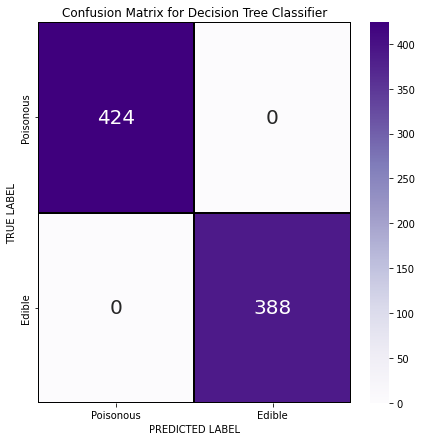

In [51]:
cm = confusion_matrix(y_test, dnn_prediction_class)

x_axis_labels = ["Poisonous","Edible"]
y_axis_labels = ["Poisonous","Edible"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, annot_kws={'size':20},linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

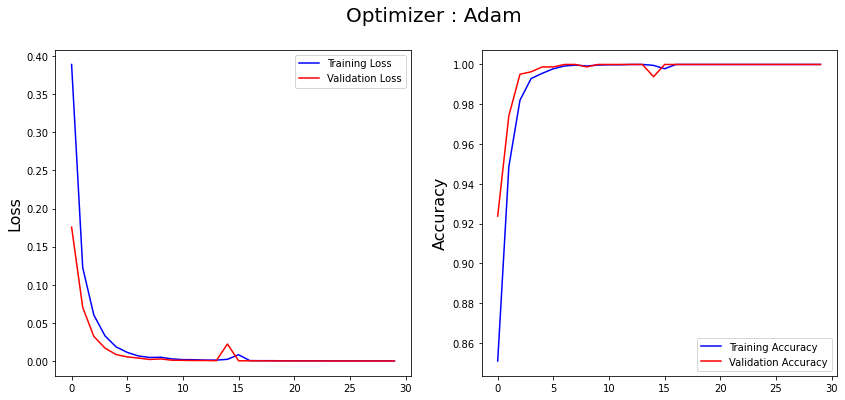

In [52]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# V. KẾT LUẬN

In [53]:
score_dict = {'KNN':[knn_f1score,knn_precision,knn_recall],
            'Logistics':[lgs_f1score,lgs_precision,lgs_recall],
            'Decision Tree':[dtc_f1score,dtc_precision,dtc_recall],
            'Cat boost':[cat_f1score,cat_precision,cat_recall],
            'DNN':[dnn_f1score,dnn_precision,dnn_recall]}
score_df = pd.DataFrame(score_dict,index=['F1-Score','Precision-Score','Recall-Score'])
score_df

,KNN,Logistics,Decision Tree,Cat boost,DNN
F1-Score,0.998713,0.967658,1.0,1.0,1.0
Precision-Score,1.000000,0.963918,1.0,1.0,1.0
Recall-Score,0.997429,0.971429,1.0,1.0,1.0


- Ta thấy rằng với bộ dữ liệu đã cho, mô hình cho tỉ lệ chính xác gần 100%